Thu thập và tiền xử lý dữ liệu cổ phiếu, chứng khoán
Khai báo thư viện yfinance để lấy dữ liệu và pandas để đọc dữ liệu


In [1]:
import yfinance as yf
import pandas as pd 

Thu thập dữ liệu

In [18]:
# lấy mã cổ phiếu apple , max là lấy từ đầu tiên tới hiện tại
ticker = yf.Ticker("AAPL")
data = ticker.history(period="max")
# dùng pandas để đưa về dưới dạng data frame
data_AAPL = pd.DataFrame(data)
# chuyển thành file cvs
data_AAPL.to_csv("dataAAPL.csv")

Hiện thị dữ liệu cổ phiếu Apple

In [6]:
#Hiện thị bộ dữ liệu apple vừa mới thu thập
#Apple
read_df = pd.read_csv("dataAAPL.csv")
read_df.set_index("Date", inplace=True)
read_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


Xữ lý dữ liệu bị thiếu

In [16]:



dataset = pd.read_csv('dataAAPL.csv')
for i in range(len(dataset.columns)):
    # Dòng này tính số lượng giá trị thiếu trong cột hiện tại. dataset[dataset.columns[i]] chọn cột, .isna() tạo một mask boolean với True đại diện cho giá trị thiếu, và .sum() 
    # đếm số lượng giá trị True, tương ứng với số lượng giá trị thiếu trong cột đó.
    missing_data = dataset[dataset.columns[i]].isna().sum()
    # Dòng này tính tỷ lệ phần trăm giá trị thiếu trong cột hiện tại. Nó chia số lượng giá trị thiếu (missing_data) cho tổng số lượng mục trong cột (len(dataset))
    # và nhân với 100 để có tỷ lệ phần trăm.
    perc_missing_data = (missing_data / len(dataset)) * 100
    #Dòng này in thông tin về giá trị thiếu trong cột hiện tại.
    print('Cột %d, số lượng giá trị thiếu: %d, tỷ lệ %.2f%%' % (i, missing_data, perc_missing_data))


Cột 0, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 1, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 2, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 3, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 4, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 5, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 6, số lượng giá trị thiếu: 0, tỷ lệ 0.00%
Cột 7, số lượng giá trị thiếu: 0, tỷ lệ 0.00%


Xóa các dữ liệu dư thừa 

In [24]:
# xóa các cột dư thừa 
columns_to_delete = ['Dividends', 'Stock Splits']

for column in columns_to_delete:
    if column in data_AAPL.columns:
        del data_AAPL[column]
data_AAPL.to_csv("dataAAPL.csv")
data_AAPL

,Open,High,Low,Close,Volume
Date,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600
...,...,...,...,...,...
2023-11-17 00:00:00-05:00,190.250000,190.380005,188.570007,189.690002,50922700
2023-11-20 00:00:00-05:00,189.889999,191.910004,189.880005,191.449997,46505100
2023-11-21 00:00:00-05:00,191.410004,191.520004,189.740005,190.639999,38134500


Dùng hàm describe để đánh giá dữ liệu và trực quan dữ liệu 

Mô tả dữ liệu:
               Open          High           Low         Close        Volume
count  10829.000000  10829.000000  10829.000000  10829.000000  1.082900e+04
mean      18.921309     19.131075     18.720976     18.934732  3.220820e+08
std       40.772885     41.233535     40.346793     40.810963  3.364973e+08
min        0.038432      0.038432      0.038000      0.038000  0.000000e+00
25%        0.240431      0.245524      0.234928      0.241206  1.165696e+08
50%        0.415514      0.422784      0.410065      0.417272  2.095072e+08
75%       16.342554     16.465206     16.194294     16.339439  4.019232e+08
max      195.717515    197.702207    194.760064    195.926956  7.421641e+09


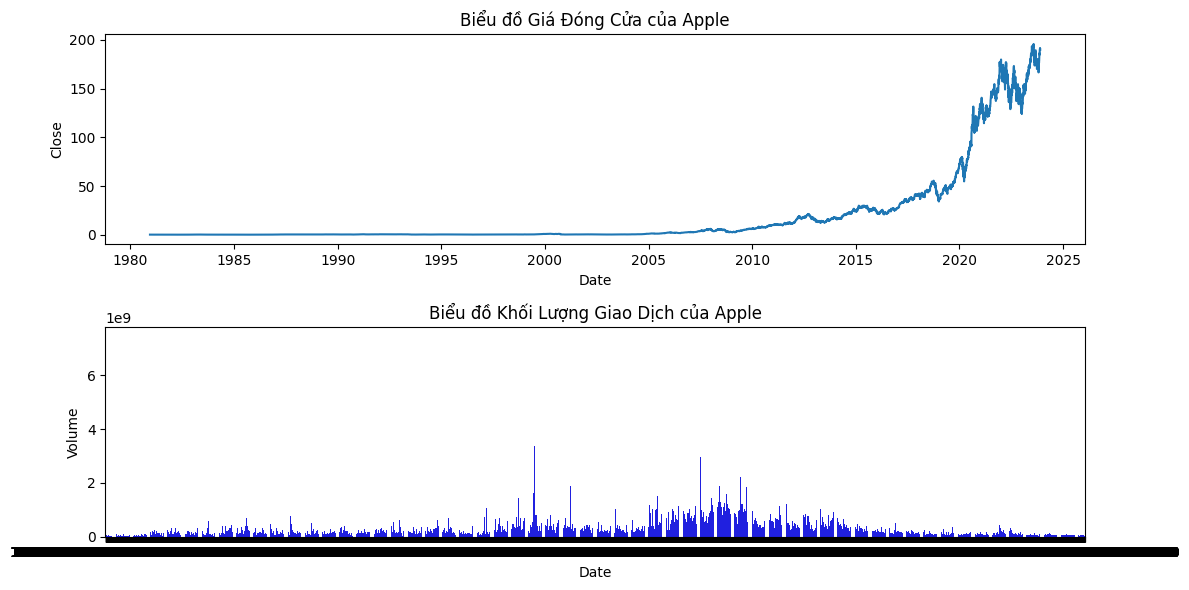

In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

# Load dữ liệu từ tệp CSV
data_AAPL = pd.read_csv('dataAAPL.csv', parse_dates=['Date'], index_col='Date')

# Đánh giá dữ liệu
data_description = data_AAPL.describe()
print("Mô tả dữ liệu:")
print(data_description)

# Trực quan hóa dữ liệu
plt.figure(figsize=(12, 6))

# Biểu đồ giá đóng cửa (Close) theo thời gian
plt.subplot(2, 1, 1)
sns.lineplot(x=data_AAPL.index, y=data_AAPL['Close'])
plt.title('Biểu đồ Giá Đóng Cửa của Apple')

# Biểu đồ khối lượng giao dịch theo thời gian
plt.subplot(2, 1, 2)
sns.barplot(x=data_AAPL.index, y=data_AAPL['Volume'], color='blue')
plt.title('Biểu đồ Khối Lượng Giao Dịch của Apple')

plt.tight_layout()
plt.show()
